In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn import grid_search
from sklearn.metrics import log_loss
from sklearn.cross_validation import train_test_split
import xgboost as xgb

from sklearn.metrics import roc_auc_score, log_loss
from sklearn import metrics

/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
train = pd.read_csv('train.csv')
#train.drop('activity_id', axis=1, inplace = True) 
#train.drop_duplicates(inplace = True)

test = pd.read_csv('test.csv')
example = pd.read_csv('BloodDonationSubmissionFormat.csv')


In [3]:
train.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [4]:
test.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,659,2,12,3000,52
1,276,21,7,1750,38
2,263,4,1,250,4
3,303,11,11,2750,38
4,83,4,12,3000,34


In [5]:
test.shape

(200, 5)

In [6]:
len(train.iloc[:,0]) - len(pd.unique(train.iloc[:,0])) # все значения уникальные, дропаем

0

In [7]:
train.drop(u'Unnamed: 0', axis=1, inplace = True) 

In [8]:
train.columns

Index([u'Months since Last Donation', u'Number of Donations',
       u'Total Volume Donated (c.c.)', u'Months since First Donation',
       u'Made Donation in March 2007'],
      dtype='object')

In [9]:
X = train.drop(u'Made Donation in March 2007', axis=1)
y = train.iloc[:,-1]

id_test = test.iloc[:,0]
df_test = test.drop(u'Unnamed: 0', axis=1, inplace = True)

X_fit, X_eval, y_fit, y_eval= train_test_split(
    X, y, test_size=0.15, random_state=1
)

In [10]:
rf = RandomForestClassifier(n_estimators=1000, n_jobs=4, max_depth =7)
rf.fit(X_fit, y_fit)
print 'RandomForestClassifier ', (log_loss(y_eval, rf.predict_proba(X_eval)))

submission = pd.DataFrame({"":id_test, "Made Donation in March 2007":rf.predict_proba(test)[:,1]})
submission.to_csv("submission_rf_5.csv", index=False)

RandomForestClassifier  0.430018365833


In [11]:
lr = LogisticRegression()

CVscores = cross_validation.cross_val_score(lr, X, y, scoring='log_loss', cv=5)

# search for the regularization parameter
Cs = 10**np.linspace(-4, 4, num=15)
grid = {'C': Cs}
gridsearch = grid_search.GridSearchCV(lr, grid, scoring='log_loss', cv=5)
gridsearch.fit(X, y)
gridscores = [-x.mean_validation_score for x in gridsearch.grid_scores_]

C = Cs[np.argmin(gridscores)]

# refit the model with the new regularization parameter
lrCV = LogisticRegression(C=C)
lrCV.fit(X_fit, y_fit)

# write log to file
logloss_train = log_loss(y_fit, lrCV.predict_proba(X_fit))
logloss_val = log_loss(y_eval, lrCV.predict_proba(X_eval))

print 'logloss_train: ', logloss_train
print 'logloss_val: ', logloss_val

/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.p

logloss_train:  0.498092790347
logloss_val:  0.462576233776


/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.py:127: DeprecationWarning: Scoring method log_loss was renamed to neg_log_loss in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/analyst/anaconda2/lib/python2.7/site-packages/sklearn/metrics/scorer.p

In [12]:
clf = xgb.XGBClassifier(missing=np.nan, max_depth=3, 
                        n_estimators=1500, learning_rate=0.005, gamma =0.3, min_child_weight = 3,
                        subsample=0.9, colsample_bytree=0.8, seed=2100,objective= 'binary:logistic')
# 'colsample_bytree': 0.8,
#   'gamma': 0.3,
#   'max_depth': 4,
#   'min_child_weight': 3,
#   'subsample': 0.9


# fitting
clf.fit(X_fit, y_fit, early_stopping_rounds=150,  eval_metric="logloss", eval_set=[(X_eval, y_eval)])

# scores
from  sklearn.metrics import log_loss
log_train = log_loss(y_fit, clf.predict_proba(X_fit)[:,1])
log_valid = log_loss(y_eval, clf.predict_proba(X_eval)[:,1])


print('\n-----------------------')
print('  logloss train: %.5f'%log_train)
print('  logloss valid: %.5f'%log_valid)
print('-----------------------')

print('\nModel parameters...')
print(clf.get_params())

#print y_pred
# y_pred= clf.predict_proba(test)[:,1]

# submission = pd.DataFrame({"t_id":id_test, "probability":y_pred})
# submission.to_csv("submission_xgboost.csv", index=False)

Will train until validation_0 error hasn't decreased in 150 rounds.
[0]	validation_0-logloss:0.691433
[1]	validation_0-logloss:0.689240
[2]	validation_0-logloss:0.687480
[3]	validation_0-logloss:0.685347
[4]	validation_0-logloss:0.683568
[5]	validation_0-logloss:0.681769
[6]	validation_0-logloss:0.679714
[7]	validation_0-logloss:0.677558
[8]	validation_0-logloss:0.675443
[9]	validation_0-logloss:0.673438
[10]	validation_0-logloss:0.671399
[11]	validation_0-logloss:0.669271
[12]	validation_0-logloss:0.667280
[13]	validation_0-logloss:0.665649
[14]	validation_0-logloss:0.663594
[15]	validation_0-logloss:0.661664
[16]	validation_0-logloss:0.659694
[17]	validation_0-logloss:0.658079
[18]	validation_0-logloss:0.656236
[19]	validation_0-logloss:0.654683
[20]	validation_0-logloss:0.652834
[21]	validation_0-logloss:0.650884
[22]	validation_0-logloss:0.649062
[23]	validation_0-logloss:0.647371
[24]	validation_0-logloss:0.645618
[25]	validation_0-logloss:0.643871
[26]	validation_0-logloss:0.6420


-----------------------
  logloss train: 0.43208
  logloss valid: 0.40631
-----------------------

Model parameters...
{'reg_alpha': 0, 'colsample_bytree': 0.8, 'silent': True, 'colsample_bylevel': 1, 'scale_pos_weight': 1, 'learning_rate': 0.005, 'missing': None, 'max_delta_step': 0, 'nthread': -1, 'base_score': 0.5, 'n_estimators': 1500, 'subsample': 0.9, 'reg_lambda': 1, 'seed': 2100, 'min_child_weight': 3, 'objective': 'binary:logistic', 'max_depth': 3, 'gamma': 0.3}


[752]	validation_0-logloss:0.408198
[753]	validation_0-logloss:0.408142
[754]	validation_0-logloss:0.408108
[755]	validation_0-logloss:0.408085
[756]	validation_0-logloss:0.408114
[757]	validation_0-logloss:0.408100
[758]	validation_0-logloss:0.408112
[759]	validation_0-logloss:0.408151
[760]	validation_0-logloss:0.408139
[761]	validation_0-logloss:0.408058
[762]	validation_0-logloss:0.408073
[763]	validation_0-logloss:0.408031
[764]	validation_0-logloss:0.407997
[765]	validation_0-logloss:0.407922
[766]	validation_0-logloss:0.407933
[767]	validation_0-logloss:0.407884
[768]	validation_0-logloss:0.407892
[769]	validation_0-logloss:0.407831
[770]	validation_0-logloss:0.407818
[771]	validation_0-logloss:0.407773
[772]	validation_0-logloss:0.407824
[773]	validation_0-logloss:0.407839
[774]	validation_0-logloss:0.407871
[775]	validation_0-logloss:0.407848
[776]	validation_0-logloss:0.407846
[777]	validation_0-logloss:0.407834
[778]	validation_0-logloss:0.407837
[779]	validation_0-logloss:0

In [13]:
#print y_pred
y_pred= clf.predict_proba(test)[:,1]

submission = pd.DataFrame({"":id_test, "Made Donation in March 2007":y_pred})
submission.to_csv("submission_xgboost.csv", index=False)

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical


nn = Sequential()
nn.add(Dense(175, input_dim=4, init='uniform'))
nn.add(Dropout(0.5))
nn.add(Activation('sigmoid'))
nn.add(Dense(2, init='uniform'))
nn.add(Activation('softmax'))

opt = Adam(lr=1e-4)
nn.compile(loss='sparse_categorical_crossentropy', optimizer=opt)
#X_fit, y_fit, early_stopping_rounds=150,  eval_metric="logloss", eval_set=[(X_eval, y_eval)
hist = nn.fit(X_fit.values, y_fit.values, nb_epoch=63, verbose=0,validation_data=(X_eval.values, y_eval.values))

Using Theano backend.


In [15]:
y_pred= nn.predict_proba(test.values, verbose=0)[:,1]

submission = pd.DataFrame({"":id_test, "Made Donation in March 2007":y_pred})
submission.to_csv("submission_NN.csv", index=False)

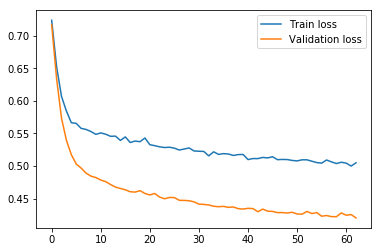

In [16]:

%matplotlib inline

plt.plot(hist.history['loss'][0:])
plt.plot(hist.history['val_loss'][0:])
plt.legend(['Train loss', 'Validation loss'])

In [17]:
clf1_p = rf.predict_proba(X_eval)[:,1]

#Logreg
clf7_p = lrCV.predict_proba(X_eval)[:,1]

#xgb
clf8_p = clf.predict_proba(X_eval)[:,1]

# #NN
clf3_p = nn.predict_proba(X_eval.values, verbose = 0)[:,1]

In [18]:
classifiers = [clf1_p, 
               clf8_p, 
               clf3_p]

predictions = pd.DataFrame(classifiers[0:2]).T

for classif in classifiers:
    print(log_loss(y_eval, classif))

0.430018365833
0.40630695956
0.420360229567


In [19]:
print(np.corrcoef(classifiers))


[[ 1.          0.9373986   0.72588806]
 [ 0.9373986   1.          0.7829662 ]
 [ 0.72588806  0.7829662   1.        ]]


In [20]:
Ps = np.array(classifiers).T
def ensemble_logloss(w):
    return log_loss(y_eval, (Ps*w).sum(1).T/np.sum(w))

In [21]:
ensemble_logloss(np.ones(len(classifiers)))


0.40818553776718286

In [22]:
def ensemble_roc_auc(w):
    return roc_auc_score(y_eval, (Ps*w).sum(1).T/np.sum(w))

In [23]:
ensemble_roc_auc(np.ones(len(classifiers)))


0.78655462184873948

In [24]:
from scipy.optimize import minimize

opt = minimize(ensemble_logloss, x0=np.ones(len(classifiers)))
print("Function result:", opt.fun)
print("Array:", opt.x)

('Function result:', 0.4058665515428579)
('Array:', array([ 0.05570982,  2.50483474,  0.43416609]))


In [25]:
w = opt.x/opt.x.sum()
w

array([ 0.01860274,  0.83641962,  0.14497764])

In [26]:
ensebmle_prob_validation = np.zeros(len(clf1_p))
for i in range(len(classifiers)):
    ensebmle_prob_validation += np.array(classifiers[i]) * w[i]

In [27]:
print log_loss(y_eval, ensebmle_prob_validation), roc_auc_score(y_eval, ensebmle_prob_validation)

0.405866552072 0.787394957983


In [28]:
def optimal(values):
    optimal_classifiers = []
    for i in range(len(values)):
        if values[i] > 0:
            print("Classifier", i+1, "is good")
            optimal_classifiers.append(classifiers[i])
    return optimal_classifiers

In [29]:
def full_negative_elimination(weights):
    global classifiers, Ps
    while sum(weights<0) > 0:
        opt = minimize(ensemble_logloss, x0=np.ones(len(classifiers)))
        print("Function result:", opt.fun)
        classifiers = optimal(opt.x)
        Ps = np.array(classifiers).T
        weights = opt.x/opt.x.sum()
        print("Current weights:", weights)
        print('=======')
    return weights

In [30]:
w = full_negative_elimination(w)

In [31]:
dtest = xgb.DMatrix(test)
p1 = rf.predict_proba(test)[:,1]

#Logreg
p7 = lrCV.predict_proba(test)[:,1]

#xgb
p8 = clf.predict_proba(test)[:,1]

p3 = nn.predict_proba(test.values, verbose = 0)[:,1]

test_predictions = [p1,  p8, p3]

In [32]:
ensebmle_prob_test = np.zeros(len(p1))
for i in range(len(test_predictions)):
    ensebmle_prob_test += np.array(test_predictions[i]) * w[i]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64d34d4350>]], dtype=object)

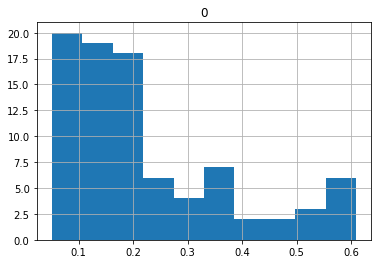

In [33]:
pd.DataFrame(ensebmle_prob_validation).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64d4c88c50>]], dtype=object)

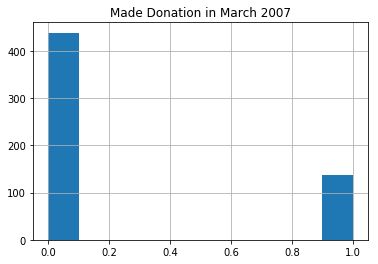

In [34]:
pd.DataFrame(y).hist()

In [35]:
submission = pd.DataFrame({"":id_test, "Made Donation in March 2007":ensebmle_prob_test})
submission.to_csv("submission_ansemble.csv", index=False)